In [ ]:
!pip install matplotlib --upgrade

     |████████████████████████████████| 10.3MB 19.7MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from sklearn.metrics import mean_squared_error
from datetime import timedelta
from tqdm import tqdm
import pywt
import pandas_datareader.data as web
import plotly.express as px
import plotly.graph_objects as go
import datetime 
import math
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import string
from datetime import date
from dateutil.relativedelta import relativedelta
import collections
warnings.filterwarnings('ignore')


In [ ]:
sns.set(rc={'figure.figsize':(20, 7)})

In [ ]:
# Code to read csv file into Colaboratory:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()

drive = GoogleDrive(gauth)

In [ ]:
# Load dataset from google drive
id = '12PEBQdsc7PfOTb-7R12W1Or3nctzwzHU'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Predictions.xlsx')  

In [ ]:
performace_df = pd.read_excel('Predictions.xlsx', sheet_name=None)

In [ ]:
stock_list = list(performace_df.keys())

In [ ]:
barda = performace_df['RENAULT SA']
barda.index = barda['Date']
barda

,Date,Actual_RENAULT SA,+6_RENAULT SA,LSTM,GRU
Date,,,,,
2017-10-24,2017-10-24,0.117000,2018-04-24,0.135527,0.220286
2017-10-25,2017-10-25,0.117590,2018-04-25,0.108896,0.216348
2017-10-26,2017-10-26,0.092571,2018-04-26,0.077968,0.204343
2017-10-27,2017-10-27,0.051291,2018-04-27,0.069722,0.198081
2017-10-30,2017-10-30,0.060309,2018-04-30,0.046272,0.188981
...,...,...,...,...,...
2020-09-30,2020-09-30,0.696103,2021-03-30,0.411193,0.434611
2020-10-01,2020-10-01,0.792680,2021-04-01,0.410976,0.434387
2020-10-06,2020-10-06,0.669873,2021-04-06,0.545747,0.529507


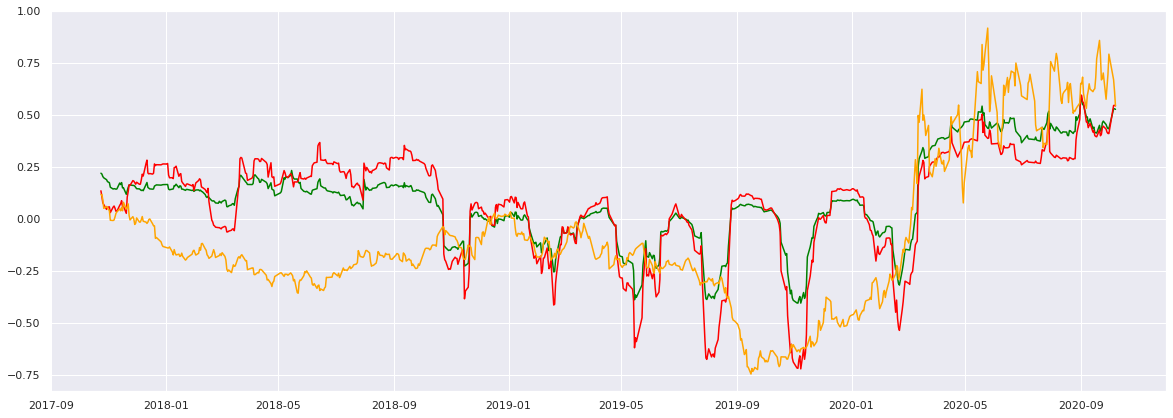

In [ ]:
plt.plot(barda['GRU'], color="green")
plt.plot(barda['LSTM'], color="red")
plt.plot(barda['Actual_RENAULT SA'], color="orange")

In [ ]:
def index_list(stock_list):
  my_list = []
  for stock in stock_list:
    df = performace_df[stock]
    df.index = df['Date']
    my_list.append(df.index)
  return my_list

In [ ]:
dates_list = index_list(stock_list)

In [ ]:
# Applying intersection
res = list(set.intersection(*map(set, dates_list)))

# Result
print("The common elements among inners lists : ",res)

The common elements among inners lists :  [Timestamp('2020-04-27 00:00:00'), Timestamp('2020-07-17 00:00:00'), Timestamp('2020-08-31 00:00:00'), Timestamp('2020-06-16 00:00:00'), Timestamp('2020-09-03 00:00:00'), Timestamp('2020-09-30 00:00:00'), Timestamp('2020-05-04 00:00:00'), Timestamp('2020-07-22 00:00:00'), Timestamp('2020-08-20 00:00:00'), Timestamp('2020-04-08 00:00:00'), Timestamp('2020-08-26 00:00:00'), Timestamp('2020-06-18 00:00:00'), Timestamp('2020-04-24 00:00:00'), Timestamp('2020-05-27 00:00:00'), Timestamp('2020-09-11 00:00:00'), Timestamp('2020-07-15 00:00:00'), Timestamp('2020-10-01 00:00:00'), Timestamp('2020-03-12 00:00:00'), Timestamp('2020-06-17 00:00:00'), Timestamp('2020-05-05 00:00:00'), Timestamp('2020-05-28 00:00:00'), Timestamp('2020-06-09 00:00:00'), Timestamp('2020-05-18 00:00:00'), Timestamp('2020-06-04 00:00:00'), Timestamp('2020-04-15 00:00:00'), Timestamp('2020-07-16 00:00:00'), Timestamp('2020-04-17 00:00:00'), Timestamp('2020-09-25 00:00:00'), Times

In [ ]:
common_df = pd.DataFrame(index=res)
common_df = common_df.sort_index()

In [ ]:
for stock in stock_list:
  ok = performace_df[stock]
  yes = ok[[ok.columns[1]]]
  hey = yes[yes.index.isin(res)]
  common_df[stock] = hey.iloc[:, 0]

In [ ]:
common_df

,GLANBIA PLC,PUMA SE,SARTORIUS AGPFD,ATLANTIA SPA,BIOMERIEUX,HERMES INTL,EUROFINS SCIEN,SARTORIUS STEDIM,CARL ZEISS MEBR,LOREAL,CORBION NV,ANDRITZ AG,IBERDROLA SA,KONINKLIJKE PHIL,ADIDAS AG,EVOTEC SE,EIFFAGE,KERRY GROUPA,RWE AG,TELEPERFORMANCE,KERING,ACCIONA SA,NEMETSCHEK SE,ANHEUSERBUSCH I,WARTSILA OYJ ABP,EDP,VINCI SA,RED ELECTRICA,DEUTSCHE BOERSE,SCHNEIDER ELECTR,SOITEC,DASSAULT SYSTEME,WOLTERS KLUWER,SAP SE,EON SE,LVMH MOET HENNE,QIAGEN NV,DEUTSCHE WOHNEN,DAVIDE CAMPARIM,FERROVIAL SA,...,SOLVAY SAA,NESTE OYJ,LEONARDO SPA,CONTINENTAL AG,A2A SPA,DEUTSCHE BANKRG,BASF SE,VERBUND AG,TECHNIPFMC PLC,MEDIOBANCA,EDF,BANCO SABADELL,VOPAK,UNITED INTERNRE,OMV AG,INTESA SANPAOLO,TOTAL SE,SOC GENERALE SA,DAIMLER AG,ENI SPA,COMMERZBANK,SCOR SE,THYSSENKRUPP AG,AEGON NV,SBM OFFSHORE NV,CTS EVENTIM AG,RATIONAL AG,RYANAIR HLDGS,ROYAL DUTCH SHA,FAURECIA,DEUTSCHE LUFTRG,MICHELIN,TENARIS SA,REPSOL SA,VALEO SA,TELECOM ITALIA S,KESKO OYJB,LANXESS AG,UNICREDIT SPA,RENAULT SA
2020-03-10,-0.109524,0.223188,0.639721,0.029360,0.548139,0.230614,0.616346,0.696233,0.089286,0.200939,0.290266,-0.033145,0.136461,0.194326,0.230769,0.079961,-0.040931,0.078228,0.169455,0.251681,0.243249,-0.026419,0.230167,0.130435,-0.100475,0.104506,0.028775,0.051266,0.116124,0.315204,0.512094,0.197785,0.136595,0.351282,0.045649,0.207736,0.158940,0.343393,0.323991,-0.076533,...,0.131587,0.544088,-0.264006,0.195762,-0.027986,0.359232,0.179615,0.143821,-0.228797,0.280125,-0.224735,-0.289416,0.087276,0.617741,-0.067258,0.054073,0.038712,-0.269591,0.516381,-0.066013,0.319920,-0.079305,0.009927,0.035571,0.254207,0.041116,0.125118,0.047969,-0.240952,0.189113,-0.167593,0.120992,-0.178648,-0.219807,0.603246,0.052288,0.317568,0.229177,-0.011066,0.231454
2020-03-11,-0.057000,0.301071,0.651256,0.041727,0.478788,0.249916,0.544742,0.746584,0.102017,0.228559,0.377663,-0.042717,0.117436,0.209310,0.361056,0.082251,-0.037362,0.082153,0.153153,0.284936,0.301254,0.018519,0.263636,0.076437,-0.114472,0.085853,0.007808,0.077609,0.146751,0.297153,0.658882,0.218104,0.156320,0.346383,0.023044,0.261851,0.159615,0.329151,0.375602,-0.064125,...,0.145297,0.461367,-0.259680,0.191620,-0.001610,0.308104,0.183053,0.199786,-0.237674,0.219529,-0.209493,-0.323933,0.039125,0.628709,-0.039744,0.000000,0.050057,-0.315531,0.505093,-0.056025,0.221100,-0.042874,-0.000683,0.010931,0.253785,0.052897,0.150000,0.067683,-0.229483,0.214243,-0.166650,0.119916,-0.171512,-0.231306,0.686426,-0.007074,0.363605,0.242308,-0.056674,0.169496
2020-03-12,0.030601,0.513502,0.847105,0.339500,0.559105,0.327143,0.681225,0.891056,0.215173,0.324883,0.531863,0.064642,0.300294,0.331032,0.571774,0.203852,0.134456,0.188797,0.394336,0.483410,0.484005,0.234414,0.443906,0.290820,0.017071,0.260195,0.215317,0.243995,0.300720,0.508633,0.945228,0.325127,0.281640,0.490649,0.148492,0.381758,0.190355,0.388720,0.639856,0.069307,...,0.346376,0.590893,-0.049043,0.443516,0.233217,0.603777,0.341237,0.370869,-0.096933,0.499793,-0.060190,-0.178744,0.091986,0.856490,0.188406,0.216298,0.232563,-0.173935,0.854752,0.152761,0.549896,0.193642,0.222571,0.289100,0.333965,0.162403,0.231974,0.151281,-0.083860,0.453484,-0.030580,0.309867,-0.025641,-0.112930,1.119181,0.217866,0.482291,0.394872,0.140108,0.498224
2020-03-13,0.003191,0.502268,0.806487,0.331494,0.453246,0.297486,0.486462,0.878424,0.178186,0.306481,0.486915,0.051538,0.238318,0.346627,0.589508,0.168224,0.145970,0.156991,0.379905,0.486812,0.408889,0.074335,0.437270,0.225292,0.012522,0.233252,0.149302,0.161210,0.305697,0.481379,0.881220,0.290083,0.277541,0.462178,0.151832,0.322960,0.184011,0.429692,0.577547,0.019830,...,0.324297,0.666181,-0.100954,0.440618,0.169811,0.530264,0.330182,0.350211,-0.027057,0.398996,-0.069457,-0.263199,0.058545,0.833860,0.200532,0.144622,0.249376,-0.251108,0.814620,0.099551,0.493440,0.240551,0.251872,0.264770,0.241623,0.241093,0.167969,0.128910,-0.071261,0.458644,-0.096170,0.281308,-0.049802,-0.152214,1.100406,0.131343,0.471204,0.372278,0.044470,0.464671
2020-03-16,-0.087185,0.512048,0.

In [ ]:
def get_performance(common_dates):
  dataframe = pd.DataFrame(index=common_dates)
  perf_lstm = dataframe.copy()
  perf_gru = dataframe.copy()
  for stock in stock_list:
    df = performace_df[stock]
    df.index = df['Date']
    gru = df[df.index.isin(perf_gru.index)]['GRU']
    lstm = df[df.index.isin(perf_lstm.index)]['LSTM']
    perf_gru[stock] = gru
    perf_lstm[stock] = lstm
  return perf_gru, perf_lstm

In [ ]:
perf_gru, perf_lstm = get_performance(res)

In [ ]:
perf_gru = perf_gru.sort_index()
perf_lstm = perf_lstm.sort_index()
actual_perf = common_df

In [ ]:
perf_lstm.head(4)

,GLANBIA PLC,PUMA SE,SARTORIUS AGPFD,ATLANTIA SPA,BIOMERIEUX,HERMES INTL,EUROFINS SCIEN,SARTORIUS STEDIM,CARL ZEISS MEBR,LOREAL,CORBION NV,ANDRITZ AG,IBERDROLA SA,KONINKLIJKE PHIL,ADIDAS AG,EVOTEC SE,EIFFAGE,KERRY GROUPA,RWE AG,TELEPERFORMANCE,KERING,ACCIONA SA,NEMETSCHEK SE,ANHEUSERBUSCH I,WARTSILA OYJ ABP,EDP,VINCI SA,RED ELECTRICA,DEUTSCHE BOERSE,SCHNEIDER ELECTR,SOITEC,DASSAULT SYSTEME,WOLTERS KLUWER,SAP SE,EON SE,LVMH MOET HENNE,QIAGEN NV,DEUTSCHE WOHNEN,DAVIDE CAMPARIM,FERROVIAL SA,...,SOLVAY SAA,NESTE OYJ,LEONARDO SPA,CONTINENTAL AG,A2A SPA,DEUTSCHE BANKRG,BASF SE,VERBUND AG,TECHNIPFMC PLC,MEDIOBANCA,EDF,BANCO SABADELL,VOPAK,UNITED INTERNRE,OMV AG,INTESA SANPAOLO,TOTAL SE,SOC GENERALE SA,DAIMLER AG,ENI SPA,COMMERZBANK,SCOR SE,THYSSENKRUPP AG,AEGON NV,SBM OFFSHORE NV,CTS EVENTIM AG,RATIONAL AG,RYANAIR HLDGS,ROYAL DUTCH SHA,FAURECIA,DEUTSCHE LUFTRG,MICHELIN,TENARIS SA,REPSOL SA,VALEO SA,TELECOM ITALIA S,KESKO OYJB,LANXESS AG,UNICREDIT SPA,RENAULT SA
2020-03-10,0.015924,0.037190,-0.017088,0.122044,0.111971,0.215543,0.175158,0.134021,0.110034,0.061270,-0.113604,0.034182,0.049966,-0.061131,0.095402,-0.165523,0.176496,0.111935,0.085918,0.084181,-0.059341,0.134200,0.103605,0.294173,0.129034,0.009655,0.038409,0.009983,0.219759,-0.031518,-0.052061,0.102377,0.155306,0.247673,0.048898,0.058975,0.069065,0.056242,0.131368,0.078437,...,0.125371,0.046359,-0.021778,-0.170065,0.024123,0.165600,0.086328,0.034243,-0.219470,-0.017557,0.093709,0.397691,0.061305,0.057888,0.146835,-0.041144,0.256011,0.051379,-0.124658,0.078342,-0.022908,0.237541,0.173587,0.020686,-0.008704,0.215558,0.222927,0.067140,0.149819,0.143405,0.018242,0.119064,0.306680,0.070647,0.063654,0.036444,0.112616,-0.000510,-0.446861,-0.114653
2020-03-11,0.014704,0.045303,-0.038678,0.115757,0.121740,0.215235,0.170981,0.125671,0.137200,0.055762,-0.094361,0.035950,0.053516,-0.071393,0.084904,-0.173134,0.179361,0.111781,0.079606,0.077912,-0.055195,0.124053,0.027795,0.281870,0.128310,0.001767,0.037560,0.016249,0.230394,-0.032585,-0.056596,0.103564,0.158124,0.249718,0.028930,0.062647,0.070292,0.055488,0.138060,0.061506,...,0.129262,0.058279,-0.023781,-0.163815,0.025422,0.161116,0.086902,0.042828,-0.228631,-0.020267,0.074534,0.391874,0.056485,0.057404,0.160260,-0.028321,0.264555,0.020797,-0.146509,0.071514,-0.029337,0.245124,0.176294,0.014484,-0.006870,0.226237,0.227057,0.068101,0.147421,0.137170,0.012363,0.128122,0.311545,0.078285,0.058520,0.024162,0.105231,-0.032820,-0.438029,-0.106566
2020-03-12,0.010808,0.156498,-0.121625,0.219289,0.118317,0.277688,0.180676,0.105575,0.154211,0.051853,-0.054360,0.051895,-0.034115,-0.079047,0.117689,-0.239563,0.076683,0.135159,0.077439,0.088105,-0.062154,0.070044,0.040341,0.373661,0.145486,-0.019940,-0.026904,0.018291,0.210468,-0.017343,-0.031132,0.102772,0.159050,0.290666,-0.045860,0.089784,0.076770,0.076214,0.187380,-0.020932,...,0.213272,0.062209,0.125165,-0.171754,0.071456,0.368380,0.109573,0.064963,-0.261040,0.152307,-0.067234,0.525368,0.048289,0.052512,0.239372,0.017907,0.268115,0.110524,-0.160009,0.053849,0.041131,0.250062,0.222303,0.266581,0.000735,0.235981,0.237711,0.068248,0.184838,0.105355,0.014374,0.062851,0.329912,0.091398,0.071028,0.083264,0.078565,-0.051085,-0.430608,0.156916
2020-03-13,0.012075,0.155793,-0.094913,0.252535,0.131115,0.261651,0.161674,0.105913,0.144115,0.038468,-0.063645,0.079880,-0.033242,-0.079890,0.117754,-0.228392,0.075264,0.125887,0.044542,0.079492,-0.016160,-0.003884,0.035399,0.359080,0.146330,-0.021853,-0.028499,0.009169,0.212495,-0.020842,-0.029955,0.101099,0.154872,0.284365,-0.071564,0.083109,0.077224,0.065079,0.166692,-0.013376,...,0.212006,0.048804,0.131625,-0.205923,0.078976,0.366956,0.095985,0.055401,-0.277839,0.159156,-0.098097,0.519139,0.043047,0.054503,0.241811,0.022647,0.268607,0.113660,-0.159017,0.046025,0.069485,0.258429,0.229703,0.386728,0.002520,0.237596,0.209051,0.069110,0.190652,0.101714,0.026494,0.068038,0.314336,0.092772,0.071186,0.091366,0.083337,-0.050347,-0.398979,0.206169


In [ ]:
perf_gru.head(4)

,GLANBIA PLC,PUMA SE,SARTORIUS AGPFD,ATLANTIA SPA,BIOMERIEUX,HERMES INTL,EUROFINS SCIEN,SARTORIUS STEDIM,CARL ZEISS MEBR,LOREAL,CORBION NV,ANDRITZ AG,IBERDROLA SA,KONINKLIJKE PHIL,ADIDAS AG,EVOTEC SE,EIFFAGE,KERRY GROUPA,RWE AG,TELEPERFORMANCE,KERING,ACCIONA SA,NEMETSCHEK SE,ANHEUSERBUSCH I,WARTSILA OYJ ABP,EDP,VINCI SA,RED ELECTRICA,DEUTSCHE BOERSE,SCHNEIDER ELECTR,SOITEC,DASSAULT SYSTEME,WOLTERS KLUWER,SAP SE,EON SE,LVMH MOET HENNE,QIAGEN NV,DEUTSCHE WOHNEN,DAVIDE CAMPARIM,FERROVIAL SA,...,SOLVAY SAA,NESTE OYJ,LEONARDO SPA,CONTINENTAL AG,A2A SPA,DEUTSCHE BANKRG,BASF SE,VERBUND AG,TECHNIPFMC PLC,MEDIOBANCA,EDF,BANCO SABADELL,VOPAK,UNITED INTERNRE,OMV AG,INTESA SANPAOLO,TOTAL SE,SOC GENERALE SA,DAIMLER AG,ENI SPA,COMMERZBANK,SCOR SE,THYSSENKRUPP AG,AEGON NV,SBM OFFSHORE NV,CTS EVENTIM AG,RATIONAL AG,RYANAIR HLDGS,ROYAL DUTCH SHA,FAURECIA,DEUTSCHE LUFTRG,MICHELIN,TENARIS SA,REPSOL SA,VALEO SA,TELECOM ITALIA S,KESKO OYJB,LANXESS AG,UNICREDIT SPA,RENAULT SA
2020-03-10,-0.002668,0.034991,0.133938,0.126461,0.104006,0.184740,0.148426,0.081843,0.106691,0.038464,-0.032631,0.091784,0.046176,-0.001583,0.047866,0.040811,0.232487,0.080919,0.044860,0.112057,-0.031054,0.098865,0.021214,0.234313,0.136373,-0.024169,0.050160,0.025073,0.135346,-0.037230,-0.034410,0.093598,0.134156,0.167027,-0.003434,0.040323,0.107299,0.072089,0.073573,0.046855,...,0.155491,0.042662,-0.054633,-0.248583,0.019557,0.078730,0.116579,-0.000857,-0.202011,-0.068823,0.071022,0.362756,0.078242,0.055582,0.073685,-0.066806,0.145400,0.020331,-0.004279,0.099959,-0.030103,0.217445,0.116063,0.064635,-0.001163,0.126518,0.135995,0.086095,0.066743,0.150556,0.034577,0.061211,0.346631,0.035236,0.034330,0.036907,0.071653,0.089737,-0.327064,0.027464
2020-03-11,-0.003892,0.041376,0.116213,0.113476,0.113085,0.183932,0.135778,0.084970,0.120402,0.036012,-0.016625,0.093293,0.041917,-0.011571,0.024294,0.035953,0.234573,0.080954,0.038729,0.110636,-0.028592,0.080730,-0.056018,0.229930,0.136138,-0.029760,0.050116,0.027614,0.139026,-0.037854,-0.044632,0.094397,0.134972,0.168366,-0.000605,0.042558,0.108633,0.071225,0.077689,0.031999,...,0.158878,0.035915,-0.055468,-0.243402,0.020141,0.071150,0.117029,0.002441,-0.201628,-0.071753,0.051818,0.357937,0.072847,0.054544,0.079850,-0.054278,0.146989,-0.002173,-0.015260,0.105059,-0.037474,0.222138,0.117367,0.062028,-0.000178,0.133917,0.141803,0.087961,0.061626,0.143784,0.030264,0.064234,0.351812,0.038014,0.029419,0.028651,0.067215,0.056774,-0.318713,0.031940
2020-03-12,-0.023117,0.123330,0.050578,0.199917,0.112382,0.240120,0.147861,0.095673,0.132046,0.034053,0.013310,0.110008,-0.022500,-0.011466,0.049777,-0.027762,0.153378,0.091918,0.021643,0.140177,-0.009655,0.038652,-0.030744,0.307295,0.147997,-0.057141,0.031981,0.023803,0.136628,-0.020675,-0.067311,0.096932,0.128665,0.202818,-0.027185,0.059804,0.115879,0.094761,0.131409,-0.063525,...,0.222543,0.036927,0.074382,-0.207736,0.061929,0.253935,0.141115,-0.000570,-0.215945,0.076454,-0.067042,0.473933,0.066913,0.064992,0.136394,-0.027915,0.174624,0.038924,-0.005728,0.091479,0.022076,0.244585,0.168426,0.244996,0.004094,0.143161,0.141031,0.094749,0.083602,0.100114,0.033753,0.025495,0.385564,0.048138,0.037785,0.081192,0.047900,0.043839,-0.327719,0.253462
2020-03-13,-0.021912,0.122820,0.070068,0.222721,0.124350,0.226893,0.131769,0.065927,0.125268,0.027251,0.006149,0.119443,-0.025329,-0.012507,0.049947,-0.018423,0.152478,0.088938,0.010077,0.133177,0.022965,-0.015169,-0.034500,0.307314,0.148179,-0.058039,0.032860,0.019998,0.137681,-0.023590,-0.062741,0.096051,0.127628,0.198449,-0.038213,0.056368,0.116309,0.086522,0.114850,-0.057953,...,0.221526,0.022174,0.080227,-0.276745,0.068473,0.257730,0.127149,-0.004667,-0.221021,0.080706,-0.075302,0.474919,0.061273,0.065488,0.137695,-0.020266,0.173674,0.044382,-0.004860,0.088721,0.041312,0.251074,0.176911,0.298732,0.005115,0.144711,0.136078,0.093667,0.077755,0.095972,0.044169,0.027665,0.366904,0.047618,0.038106,0.089052,0.050195,0.043043,-0.292634,0.290100


In [ ]:
common_df.head(4)

,GLANBIA PLC,PUMA SE,SARTORIUS AGPFD,ATLANTIA SPA,BIOMERIEUX,HERMES INTL,EUROFINS SCIEN,SARTORIUS STEDIM,CARL ZEISS MEBR,LOREAL,CORBION NV,ANDRITZ AG,IBERDROLA SA,KONINKLIJKE PHIL,ADIDAS AG,EVOTEC SE,EIFFAGE,KERRY GROUPA,RWE AG,TELEPERFORMANCE,KERING,ACCIONA SA,NEMETSCHEK SE,ANHEUSERBUSCH I,WARTSILA OYJ ABP,EDP,VINCI SA,RED ELECTRICA,DEUTSCHE BOERSE,SCHNEIDER ELECTR,SOITEC,DASSAULT SYSTEME,WOLTERS KLUWER,SAP SE,EON SE,LVMH MOET HENNE,QIAGEN NV,DEUTSCHE WOHNEN,DAVIDE CAMPARIM,FERROVIAL SA,...,SOLVAY SAA,NESTE OYJ,LEONARDO SPA,CONTINENTAL AG,A2A SPA,DEUTSCHE BANKRG,BASF SE,VERBUND AG,TECHNIPFMC PLC,MEDIOBANCA,EDF,BANCO SABADELL,VOPAK,UNITED INTERNRE,OMV AG,INTESA SANPAOLO,TOTAL SE,SOC GENERALE SA,DAIMLER AG,ENI SPA,COMMERZBANK,SCOR SE,THYSSENKRUPP AG,AEGON NV,SBM OFFSHORE NV,CTS EVENTIM AG,RATIONAL AG,RYANAIR HLDGS,ROYAL DUTCH SHA,FAURECIA,DEUTSCHE LUFTRG,MICHELIN,TENARIS SA,REPSOL SA,VALEO SA,TELECOM ITALIA S,KESKO OYJB,LANXESS AG,UNICREDIT SPA,RENAULT SA
2020-03-10,-0.109524,0.223188,0.639721,0.029360,0.548139,0.230614,0.616346,0.696233,0.089286,0.200939,0.290266,-0.033145,0.136461,0.194326,0.230769,0.079961,-0.040931,0.078228,0.169455,0.251681,0.243249,-0.026419,0.230167,0.130435,-0.100475,0.104506,0.028775,0.051266,0.116124,0.315204,0.512094,0.197785,0.136595,0.351282,0.045649,0.207736,0.158940,0.343393,0.323991,-0.076533,...,0.131587,0.544088,-0.264006,0.195762,-0.027986,0.359232,0.179615,0.143821,-0.228797,0.280125,-0.224735,-0.289416,0.087276,0.617741,-0.067258,0.054073,0.038712,-0.269591,0.516381,-0.066013,0.319920,-0.079305,0.009927,0.035571,0.254207,0.041116,0.125118,0.047969,-0.240952,0.189113,-0.167593,0.120992,-0.178648,-0.219807,0.603246,0.052288,0.317568,0.229177,-0.011066,0.231454
2020-03-11,-0.057000,0.301071,0.651256,0.041727,0.478788,0.249916,0.544742,0.746584,0.102017,0.228559,0.377663,-0.042717,0.117436,0.209310,0.361056,0.082251,-0.037362,0.082153,0.153153,0.284936,0.301254,0.018519,0.263636,0.076437,-0.114472,0.085853,0.007808,0.077609,0.146751,0.297153,0.658882,0.218104,0.156320,0.346383,0.023044,0.261851,0.159615,0.329151,0.375602,-0.064125,...,0.145297,0.461367,-0.259680,0.191620,-0.001610,0.308104,0.183053,0.199786,-0.237674,0.219529,-0.209493,-0.323933,0.039125,0.628709,-0.039744,0.000000,0.050057,-0.315531,0.505093,-0.056025,0.221100,-0.042874,-0.000683,0.010931,0.253785,0.052897,0.150000,0.067683,-0.229483,0.214243,-0.166650,0.119916,-0.171512,-0.231306,0.686426,-0.007074,0.363605,0.242308,-0.056674,0.169496
2020-03-12,0.030601,0.513502,0.847105,0.339500,0.559105,0.327143,0.681225,0.891056,0.215173,0.324883,0.531863,0.064642,0.300294,0.331032,0.571774,0.203852,0.134456,0.188797,0.394336,0.483410,0.484005,0.234414,0.443906,0.290820,0.017071,0.260195,0.215317,0.243995,0.300720,0.508633,0.945228,0.325127,0.281640,0.490649,0.148492,0.381758,0.190355,0.388720,0.639856,0.069307,...,0.346376,0.590893,-0.049043,0.443516,0.233217,0.603777,0.341237,0.370869,-0.096933,0.499793,-0.060190,-0.178744,0.091986,0.856490,0.188406,0.216298,0.232563,-0.173935,0.854752,0.152761,0.549896,0.193642,0.222571,0.289100,0.333965,0.162403,0.231974,0.151281,-0.083860,0.453484,-0.030580,0.309867,-0.025641,-0.112930,1.119181,0.217866,0.482291,0.394872,0.140108,0.498224
2020-03-13,0.003191,0.502268,0.806487,0.331494,0.453246,0.297486,0.486462,0.878424,0.178186,0.306481,0.486915,0.051538,0.238318,0.346627,0.589508,0.168224,0.145970,0.156991,0.379905,0.486812,0.408889,0.074335,0.437270,0.225292,0.012522,0.233252,0.149302,0.161210,0.305697,0.481379,0.881220,0.290083,0.277541,0.462178,0.151832,0.322960,0.184011,0.429692,0.577547,0.019830,...,0.324297,0.666181,-0.100954,0.440618,0.169811,0.530264,0.330182,0.350211,-0.027057,0.398996,-0.069457,-0.263199,0.058545,0.833860,0.200532,0.144622,0.249376,-0.251108,0.814620,0.099551,0.493440,0.240551,0.251872,0.264770,0.241623,0.241093,0.167969,0.128910,-0.071261,0.458644,-0.096170,0.281308,-0.049802,-0.152214,1.100406,0.131343,0.471204,0.372278,0.044470,0.464671


# Performance Analysis

In [ ]:
relevant_dates = []
perf_gru["Month-year"] = perf_gru.index.to_period('M')
for i in perf_gru.index.to_period('M').unique():
  relevant_dates.append(perf_gru[perf_gru["Month-year"]==i].last_valid_index())

In [ ]:
relevant_dates

[Timestamp('2020-03-30 00:00:00'),
 Timestamp('2020-04-30 00:00:00'),
 Timestamp('2020-05-29 00:00:00'),
 Timestamp('2020-06-30 00:00:00'),
 Timestamp('2020-07-31 00:00:00'),
 Timestamp('2020-08-31 00:00:00'),
 Timestamp('2020-09-30 00:00:00'),
 Timestamp('2020-10-08 00:00:00')]

In [ ]:
relevant_lstm = perf_lstm[perf_lstm.index.isin(relevant_dates)]
relevant_gru = perf_gru[perf_gru.index.isin(relevant_dates)]
del relevant_gru["Month-year"]
relevant_actual = common_df[common_df.index.isin(relevant_dates)]

In [ ]:
def get_best_per_month(dataframe, nb_stocks):
  my_dict = {}
  for date in dataframe.index:
    row = dataframe.loc[date].sort_values(ascending=False)[:nb_stocks]
    df = pd.DataFrame(row.values, index = row.index, columns=["Performance"])
    df['Stocks'] = df.index
    df = df.reset_index(drop=True)
    df = df[df.columns.to_list()[::-1]]
    my_dict[date] = df
  return my_dict

In [ ]:
performance_dict_gru = get_best_per_month(relevant_gru, 10)
performance_dict_lstm = get_best_per_month(relevant_lstm, 10)
performance_dict_actual = get_best_per_month(relevant_actual, 10)

In [ ]:
df_performance_actual = pd.concat(performance_dict_actual, axis=1, ignore_index=False)
df_performance_lstm = pd.concat(performance_dict_lstm, axis=1, ignore_index=False)
df_performance_gru = pd.concat(performance_dict_gru, axis=1, ignore_index=False)

In [ ]:
df_performance_gru

2020-03-30              ...      2020-10-08            
             Stocks Performance  ...          Stocks Performance
0    BANCO SABADELL    0.576887  ...         NATIXIS    0.587359
1         SAFRAN SA    0.470588  ...      RENAULT SA    0.527223
2      AMPLIFON SPA    0.425695  ...  BANCO SABADELL    0.476966
3     INFINEON TECH    0.422080  ...    GALAPAGOS NV    0.456355
4     ARCELORMITTAL    0.413615  ...       SAFRAN SA    0.427066
5  BE SEMICONDUCTOR    0.400339  ...             ACS    0.387834
6      ATLANTIA SPA    0.363305  ...         COVIVIO    0.377981
7               ACS    0.358311  ...        FAURECIA    0.375905
8   ANHEUSERBUSCH I    0.354784  ...       KLEPIERRE    0.366532
9        RENAULT SA    0.353925  ...    ATLANTIA SPA    0.365270

[10 rows x 16 columns]

In [ ]:
df_performance_actual

2020-03-30              ...        2020-10-08            
            Stocks Performance  ...            Stocks Performance
0            IPSEN    0.896442  ...   THYSSENKRUPP AG    1.466508
1  FLUTTER ENTERDI    0.872099  ...        TENARIS SA    1.084007
2           SOITEC    0.865152  ...  BE SEMICONDUCTOR    1.049788
3         VALEO SA    0.810345  ...       ASM INTL NV    1.044667
4       KESKO OYJB    0.792626  ...     ARCELORMITTAL    0.981484
5    INFINEON TECH    0.781546  ...   PORSCHE AUTOPRF    0.910572
6       DAIMLER AG    0.692152  ...           NATIXIS    0.884058
7   KINGSPAN GROUP    0.689130  ...              BBVA    0.863860
8  PROSIEBENSAT1 M    0.684456  ...            OMV AG    0.797297
9     SAINT GOBAIN    0.679179  ...   BANCO SANTANDER    0.776832

[10 rows x 16 columns]

In [ ]:
df_performance_lstm

2020-03-30              ...       2020-10-08            
             Stocks Performance  ...           Stocks Performance
0    BANCO SABADELL    0.625242  ...          NATIXIS    0.798836
1  WARTSILA OYJ ABP    0.451624  ...       RENAULT SA    0.543849
2     INFINEON TECH    0.450541  ...          COVIVIO    0.536282
3           NATIXIS    0.443436  ...     GALAPAGOS NV    0.516242
4               ACS    0.436365  ...   BANCO SABADELL    0.469481
5         SAFRAN SA    0.433082  ...  BANCO SANTANDER    0.464027
6      AMPLIFON SPA    0.431821  ...        KLEPIERRE    0.404196
7  BE SEMICONDUCTOR    0.426607  ...    ARCELORMITTAL    0.393828
8           PUMA SE    0.411996  ...     ATLANTIA SPA    0.366228
9      ATLANTIA SPA    0.406126  ...        SAFRAN SA    0.332706

[10 rows x 16 columns]

In [ ]:
df_performance_gru

2020-03-30              ...      2020-10-08            
             Stocks Performance  ...          Stocks Performance
0    BANCO SABADELL    0.576887  ...         NATIXIS    0.587359
1         SAFRAN SA    0.470588  ...      RENAULT SA    0.527223
2      AMPLIFON SPA    0.425695  ...  BANCO SABADELL    0.476966
3     INFINEON TECH    0.422080  ...    GALAPAGOS NV    0.456355
4     ARCELORMITTAL    0.413615  ...       SAFRAN SA    0.427066
5  BE SEMICONDUCTOR    0.400339  ...             ACS    0.387834
6      ATLANTIA SPA    0.363305  ...         COVIVIO    0.377981
7               ACS    0.358311  ...        FAURECIA    0.375905
8   ANHEUSERBUSCH I    0.354784  ...       KLEPIERRE    0.366532
9        RENAULT SA    0.353925  ...    ATLANTIA SPA    0.365270

[10 rows x 16 columns]

### Start analysis here


In [ ]:
def prediction_analysis():
  return None

In [ ]:
period_gru = df_performance_gru[[df_performance_gru.columns[0], df_performance_gru.columns[1]]]
period_gru

2020-03-30            
             Stocks Performance
0    BANCO SABADELL    0.576887
1         SAFRAN SA    0.470588
2      AMPLIFON SPA    0.425695
3     INFINEON TECH    0.422080
4     ARCELORMITTAL    0.413615
5  BE SEMICONDUCTOR    0.400339
6      ATLANTIA SPA    0.363305
7               ACS    0.358311
8   ANHEUSERBUSCH I    0.354784
9        RENAULT SA    0.353925

In [ ]:
period_lstm = df_performance_lstm[[df_performance_lstm.columns[0], df_performance_lstm.columns[1]]]
period_lstm

2020-03-30            
             Stocks Performance
0    BANCO SABADELL    0.625242
1  WARTSILA OYJ ABP    0.451624
2     INFINEON TECH    0.450541
3           NATIXIS    0.443436
4               ACS    0.436365
5         SAFRAN SA    0.433082
6      AMPLIFON SPA    0.431821
7  BE SEMICONDUCTOR    0.426607
8           PUMA SE    0.411996
9      ATLANTIA SPA    0.406126

In [ ]:
actual_lstm = pd.DataFrame(relevant_actual.iloc[0])
actual_lstm.columns = ['Performance']
actual_lstm = actual_lstm[actual_lstm.index.isin(period_lstm[period_lstm.columns[0]].values)]
actual_lstm

,Performance
PUMA SE,0.419391
ATLANTIA SPA,0.260441
WARTSILA OYJ ABP,0.041228
BE SEMICONDUCTOR,0.361742
SAFRAN SA,-0.005418
AMPLIFON SPA,0.610438
NATIXIS,-0.383617
ACS,0.188766
INFINEON TECH,0.781546
BANCO SABADELL,-0.348103


In [ ]:
actual_gru = pd.DataFrame(relevant_actual.iloc[0])
actual_gru.columns = ['Performance']
actual_gru = actual_gru[actual_gru.index.isin(period_gru[period_gru.columns[0]].values)]
actual_gru

,Performance
ATLANTIA SPA,0.260441
ANHEUSERBUSCH I,0.188151
BE SEMICONDUCTOR,0.361742
SAFRAN SA,-0.005418
AMPLIFON SPA,0.610438
ARCELORMITTAL,0.427461
ACS,0.188766
INFINEON TECH,0.781546
BANCO SABADELL,-0.348103
RENAULT SA,0.289807


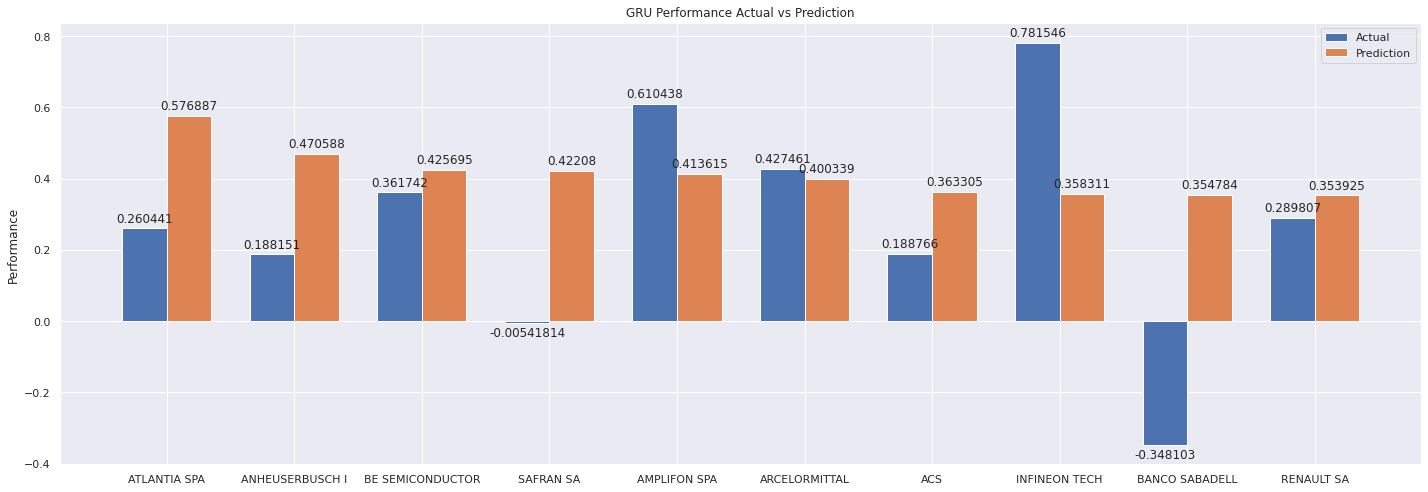

In [ ]:
labels = actual_gru.index
actual_gru_values = actual_gru['Performance'].values
predicted_gru_values = period_gru[period_gru.columns[1]].values

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, actual_gru_values, width, label='Actual')
rects2 = ax.bar(x + width/2, predicted_gru_values, width, label='Prediction')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Performance')
ax.set_title('GRU Performance Actual vs Prediction')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()

plt.show()

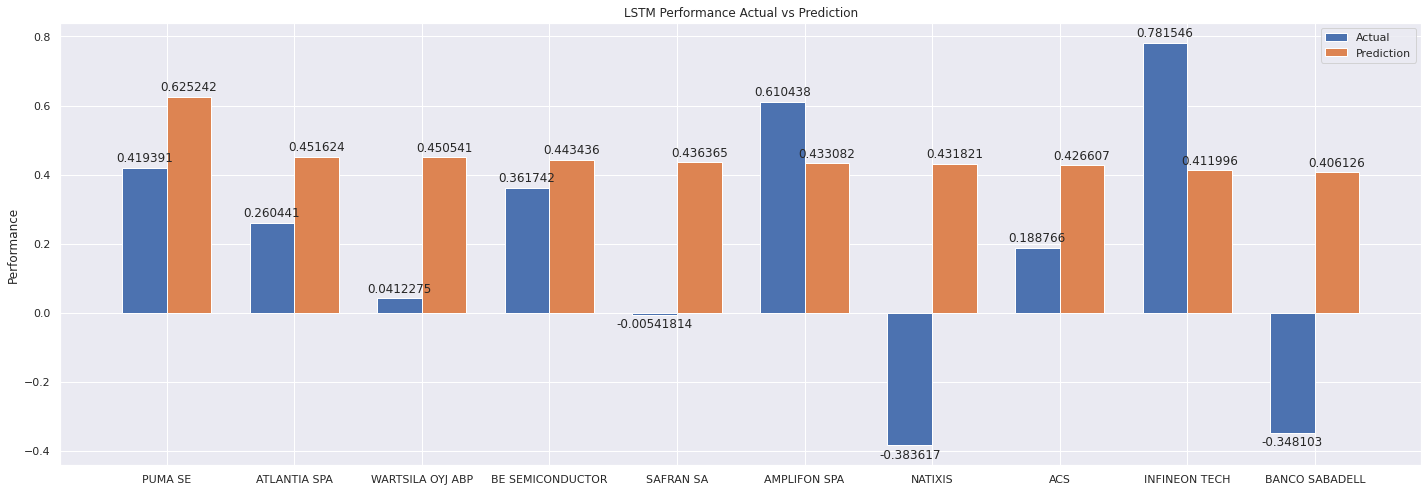

In [ ]:
labels_lstm = actual_lstm.index
actual_lstm_values = actual_lstm['Performance'].values
predicted_lstm_values = period_lstm[period_lstm.columns[1]].values

x = np.arange(len(labels_lstm))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1_lstm = ax.bar(x - width/2, actual_lstm_values, width, label='Actual')
rects2_lstm = ax.bar(x + width/2, predicted_lstm_values, width, label='Prediction')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Performance')
ax.set_title('LSTM Performance Actual vs Prediction')
ax.set_xticks(x)
ax.set_xticklabels(labels_lstm)
ax.legend()

ax.bar_label(rects1_lstm, padding=3)
ax.bar_label(rects2_lstm, padding=3)

fig.tight_layout()

plt.show()

In [ ]:
base = 100
perf_list = {"LSTM" : {}, "Actual" : {}}
for index, col in enumerate(df_performance_lstm.columns):
  if index % 2 !=0:
    perf_list["LSTM"][col[0]] = (df_performance_lstm[col].sum() + 10)*base
    perf_list["Actual"][col[0]] = (relevant_actual[performance_dict_lstm[col[0]]['Stocks']].loc[col[0]].sum() + 10) *base

<AxesSubplot:>

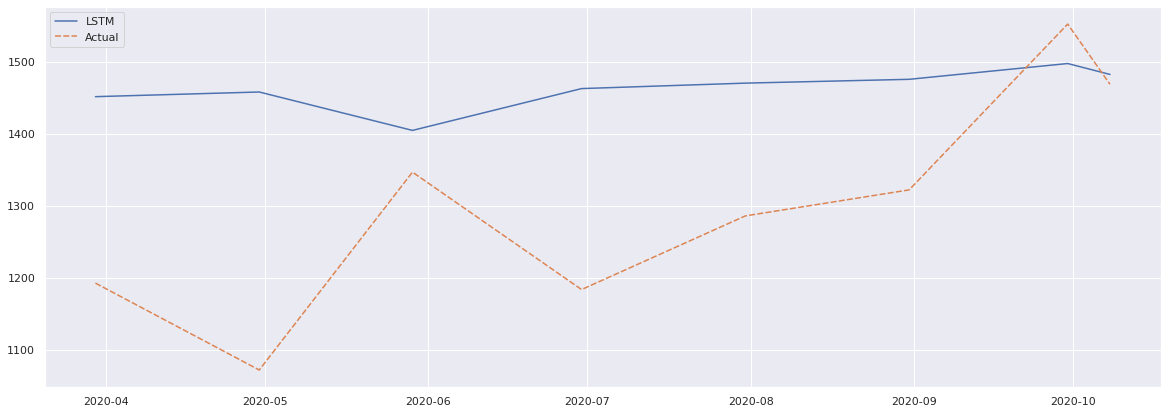

In [ ]:
sns.lineplot(data = pd.DataFrame(perf_list))

In [ ]:
base = 100
perf_list_gru = {"GRU" : {}, "Actual" : {}}
for index, col in enumerate(df_performance_gru.columns):
  if index % 2 !=0:
    perf_list_gru["GRU"][col[0]] = (df_performance_gru[col].sum() + 10)*base
    perf_list_gru["Actual"][col[0]] = (relevant_actual[performance_dict_gru[col[0]]['Stocks']].loc[col[0]].sum() + 10) *base

<AxesSubplot:>

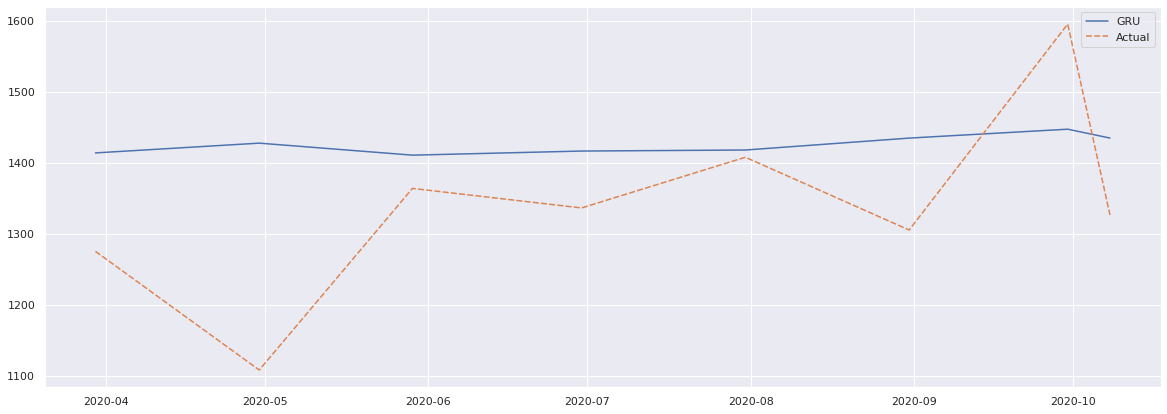

In [ ]:
sns.lineplot(data = pd.DataFrame(perf_list_gru))